# Multiple correlation regression analysis

In [1]:
#import necesspry Libraries
import pandas as pd
import numpy as np

In [2]:
#Load DataSet
cars=pd.read_csv("Cars.csv")
cars

HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]

### Exploratory data analysis

 1.Measure the central tendency
 
 2.Measure the dispersion
 
 3.Third moment business 
 
 4.Fourth moment business decision
 
 5.probability distribution
 
 6.Graphical representation(Histogram,Boxplot)

In [3]:
cars.describe()

HP        MPG         VOL          SP         WT
count   81.000000  81.000000   81.000000   81.000000  81.000000
mean   117.469136  34.422076   98.765432  121.540272  32.412577
std     57.113502   9.131445   22.301497   14.181432   7.492813
min     49.000000  12.101263   50.000000   99.564907  15.712859
25%     84.000000  27.856252   89.000000  113.829145  29.591768
50%    100.000000  35.152727  101.000000  118.208698  32.734518
75%    140.000000  39.531633  113.000000  126.404312  37.392524
max    322.000000  53.700681  160.000000  169.598513  52.997752

### Graphical representation

{'whiskers': [<matplotlib.lines.Line2D at 0x27dbf860e90>,
 'caps': [<matplotlib.lines.Line2D at 0x27dbf862750>,
 'boxes': [<matplotlib.lines.Line2D at 0x27dbf8608d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27dbf863d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x27dbf870890>],
 'means': []}

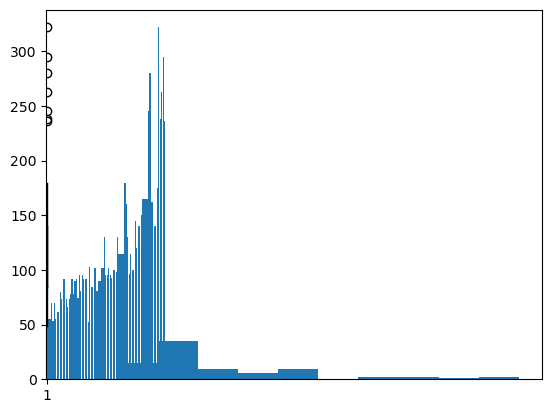

In [4]:
import matplotlib.pyplot as plt
plt.bar(height=cars.HP,x=np.arange(1,82,1))
plt.hist(cars.HP)
plt.boxplot(cars.HP)

There are several outliers in HP columns

similar operations are expected for other three columns

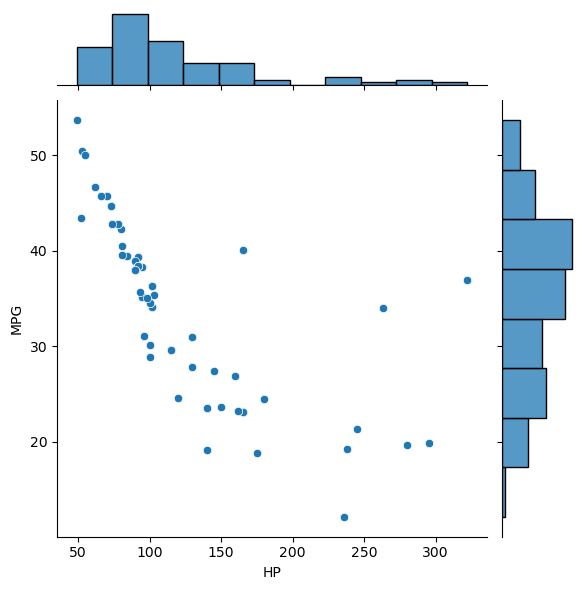

In [6]:
#Now let us plot joint plot,it is to show scatter plot and histogram
import seaborn as sns
sns.jointplot(x=cars['HP'],y=cars['MPG'])

<Axes: ylabel='count'>

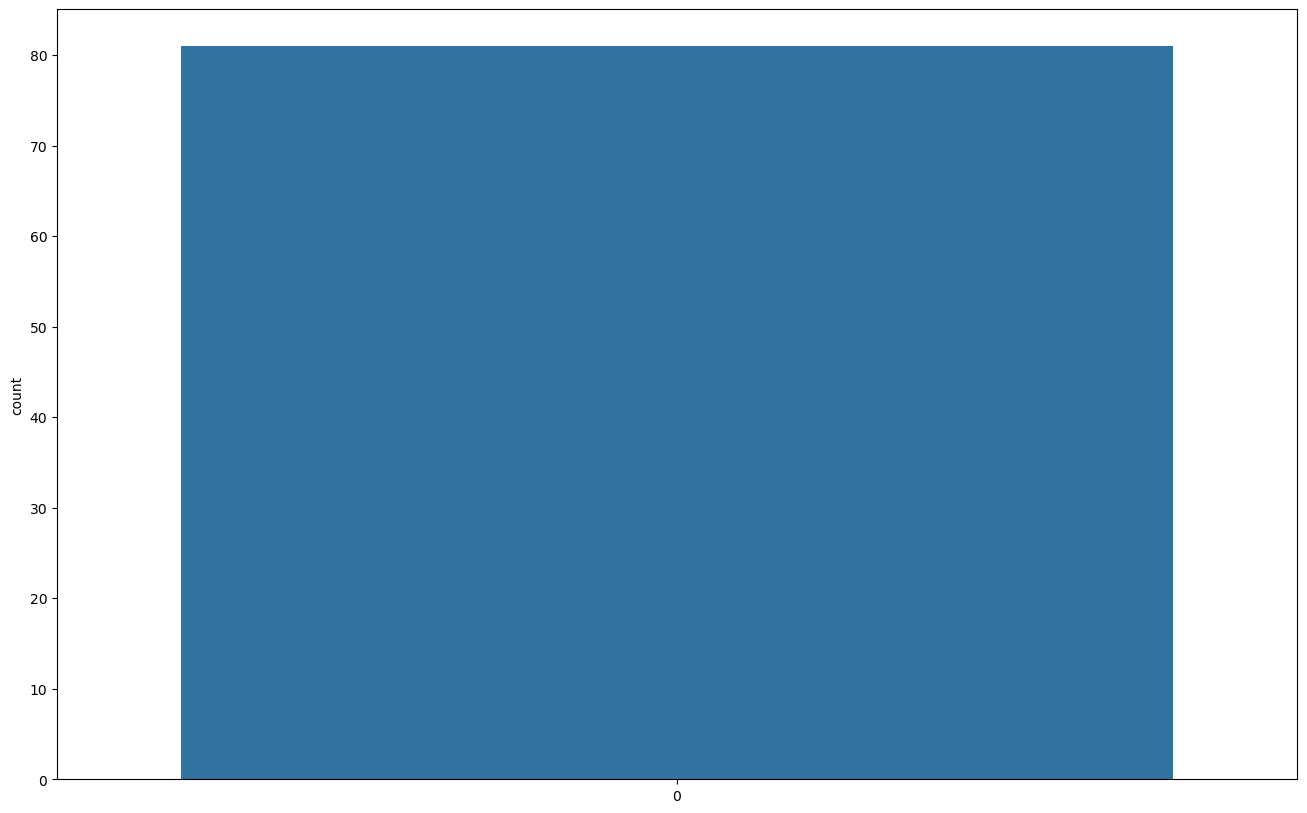

In [7]:
#Now let us plot count plot
plt.figure(1,figsize=(16,10))
sns.countplot(cars['HP'])
#count plot shows how many times the each value occured
#92 HP value accured 7 times

## QQ plot

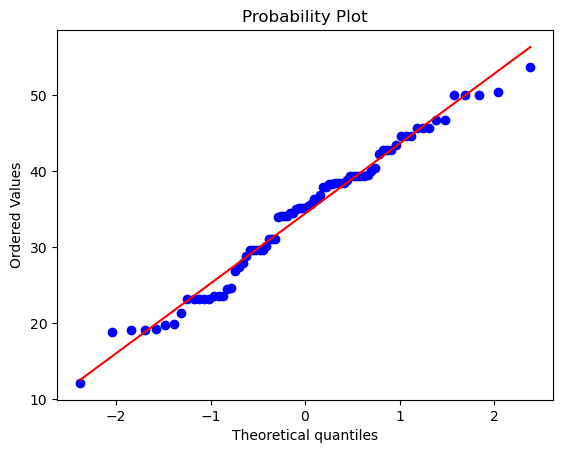

In [8]:
from scipy import stats
import pylab
stats.probplot(cars.MPG,dist = "norm", plot=pylab)
plt.show()

MPG data is normally distributed

There are 10 scatter plot need to be plotted , one by one
    
in sequence to plot, so we can use pair plots

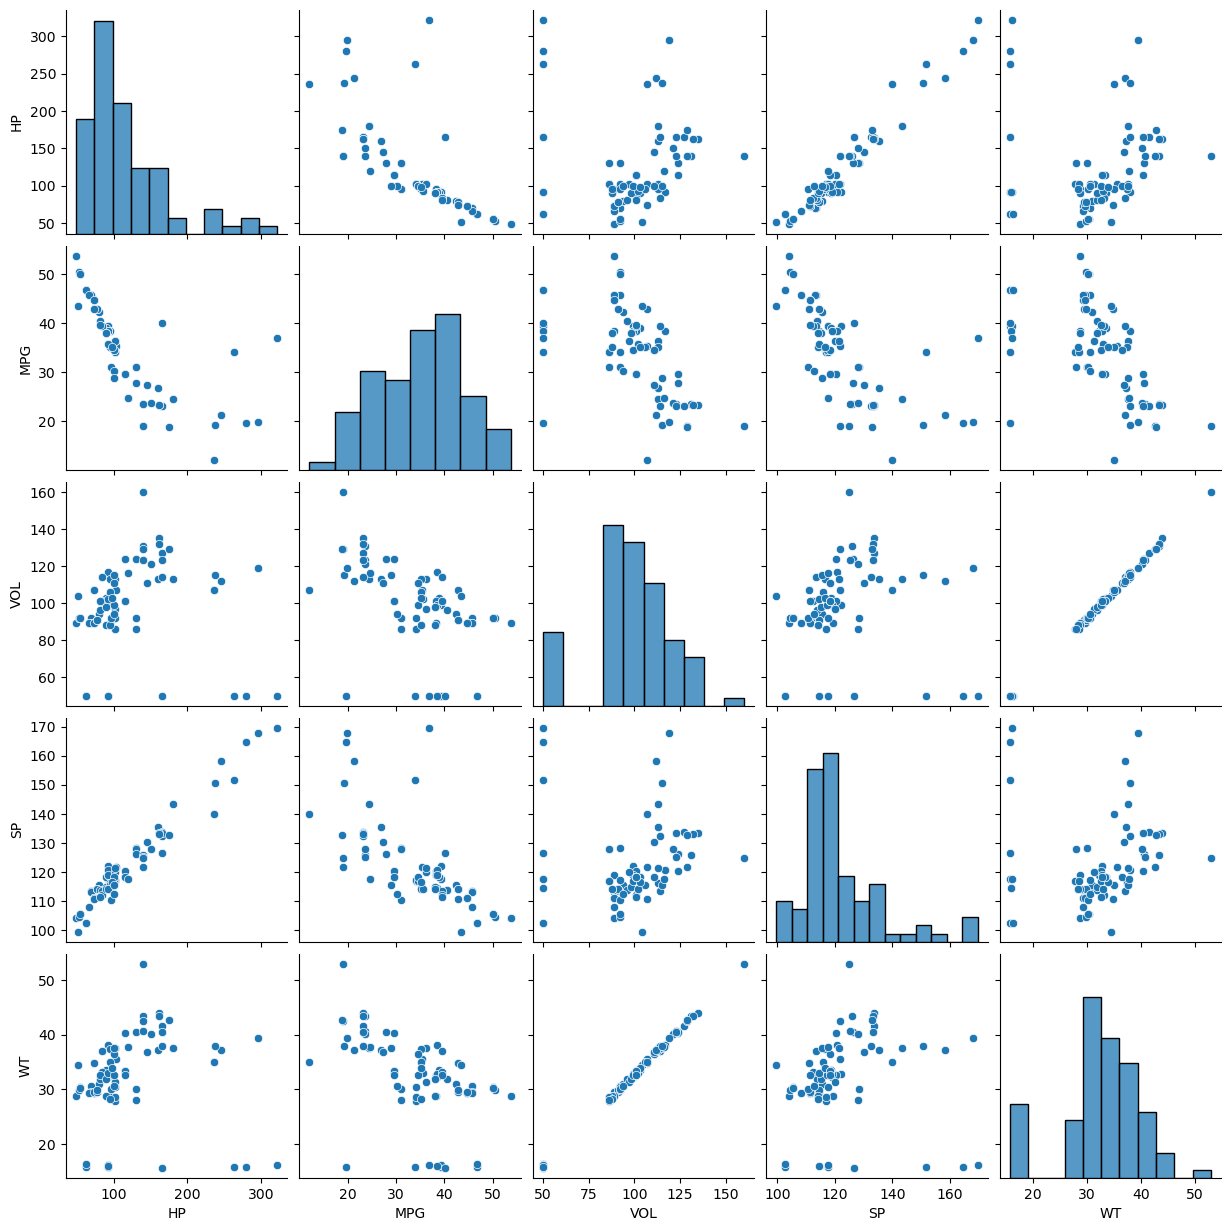

In [10]:
import seaborn as sns
sns.pairplot(cars.iloc[:,:])

you can check the collinearity problem between the input variable

you can check plot between SP and HP they are strongly corelated

same way you can check WT and VOL,it is also strongly corelated

In [12]:
#Now let us check r value between variables
cars.corr()
#you can check SP and HP r value is 0.97
#same way WT and VOL it has got 0.999 which is greater

HP       MPG       VOL        SP        WT
HP   1.000000 -0.725038  0.077459  0.973848  0.076513
MPG -0.725038  1.000000 -0.529057 -0.687125 -0.526759
VOL  0.077459 -0.529057  1.000000  0.102170  0.999203
SP   0.973848 -0.687125  0.102170  1.000000  0.102439
WT   0.076513 -0.526759  0.999203  0.102439  1.000000

In [13]:
#NOw although we observed strongly corelated pairs
#still we will go for linear regression
import statsmodels.formula.api as smf
ml1=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        00:35:03   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#r square value observed is 0.771<0.85
#p value of WT and VOL is 0.814 and 0.556 which is very high
#it means it is gfeater than 0.05,WT and VOl col needs to be ignored or delete.
#Instead od deleting all entries let us check row wise outliers
#indentify if there is any influenyial value
#to check you can yse influential index

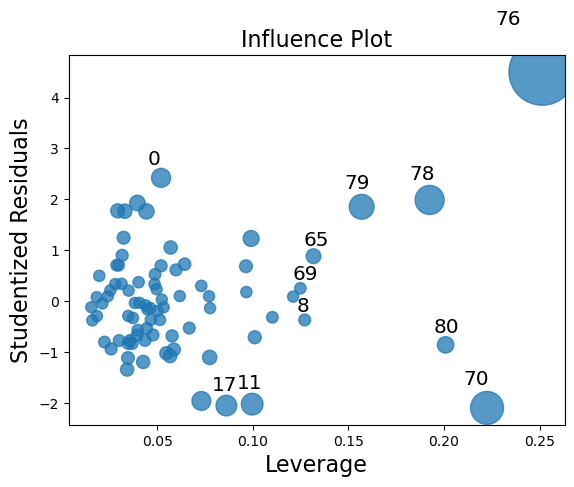

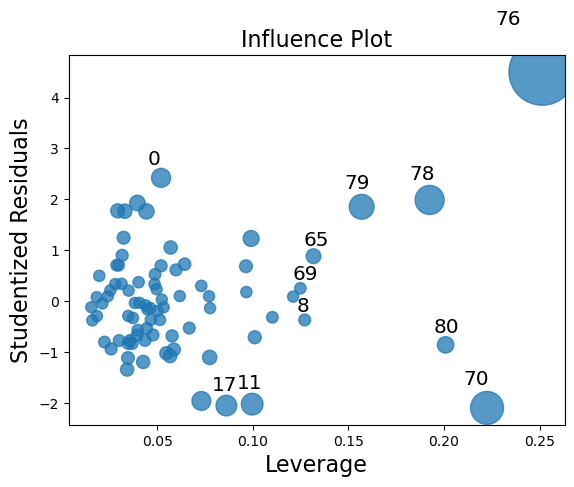

In [14]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)
#76 is the value which has got outliers
#go to the dataframe and check 76th entry

In [15]:
#Let us delete that entry
cars_new=cars.drop(cars.index[[76]])


In [16]:
#again apply regression  to cars_new
ml1_new=smf.ols('MPG~WT+VOL+SP+HP',data=cars_new).fit()
ml1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.96
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           4.42e-27
Time:                        00:37:53   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             454.0
Df Residuals:                      75   BIC:                             465.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8268     13.323      2.089      0.040       1.287      54.367
WT             0.0375      1.515      0.025      0.980      -2.980       3.055
VOL           -0.1855      0.509     -0.364      0.717      -1.199       0.828
SP             0.4119      0.141      2.913      0.005       0.130       0.694
HP            -0.2266      0.035     -6.413      0.000      -0.297      -0.156
==============================================================================
Omnibus:                        9.877   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.708
Skew:                           0.768   Prob(JB):                      0.00780
Kurtosis:                       3.744   Cond. No.                     5.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#R-square value is 0.819 but p value are same hence not solving the purpose
#Now next option is delete the column but
#question is which option is to be deleted
#we have already checked correlation factor r
#VOL has got -0.529 and for WT =-0.526
#WT is less hence can be deleted

In [17]:
#Another approach is to check the collonearity,rsquare is given
#that value we will have to apply regression w.r.t x1 and input
#as x2,x3 and x4 so on so forth
rsq_hp=smf.ols('MPG~WT+VOL+SP',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)
#VIF is variance influential factor calculating VIF helps to
#of x1 w.r.t x2,x3 and x4

In [18]:
rsq_wt=smf.ols('MPG~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)


In [19]:
rsq_vol=smf.ols('MPG~HP+WT+SP',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

In [20]:
rsq_sp=smf.ols('MPG~HP+WT+VOL',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)


In [21]:
#vif_wt=639.53,vif_vol=638.80 hence vif_wt is grater,thumb rule is vif sholud not be greater than 10

In [22]:
#storing the values in dataframe
d1={'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame=pd.DataFrame(d1)
vif_frame

Variables       VIF
0        HP  3.201804
1        WT  4.354800
2       VOL  4.338071
3        SP  4.026880

In [23]:
#let us drop WT and apply correlation to remaining three
final_ml=smf.ols('MPG~HP+VOL+SP',data=cars).fit()
final_ml.summary()
#r square is  0.770 and p value 0.00,0.012<0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        00:40:17   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# prediction
pred=final_ml.predict(cars)

## QQ plot

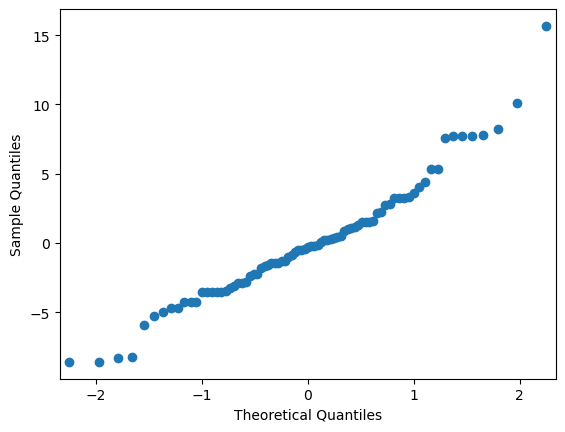

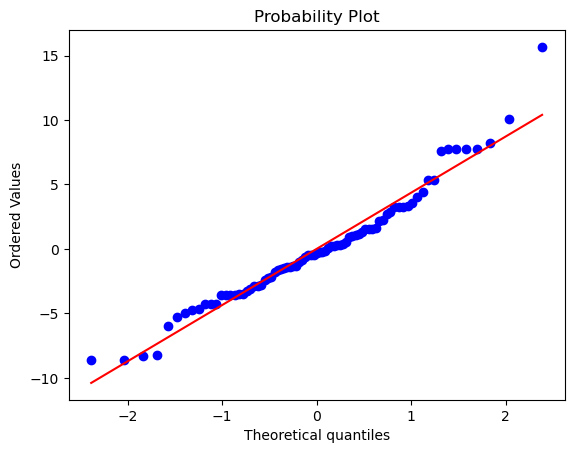

In [25]:
res=final_ml.resid
sm.qqplot(res)
plt.show()
#This qq plot is on residual which os obtained on training data
#errors are obtained on test data
stats.probplot(res,dist='norm',plot=pylab)
plt.show()

Text(0.5, 1.0, 'Fitted vs Residual')

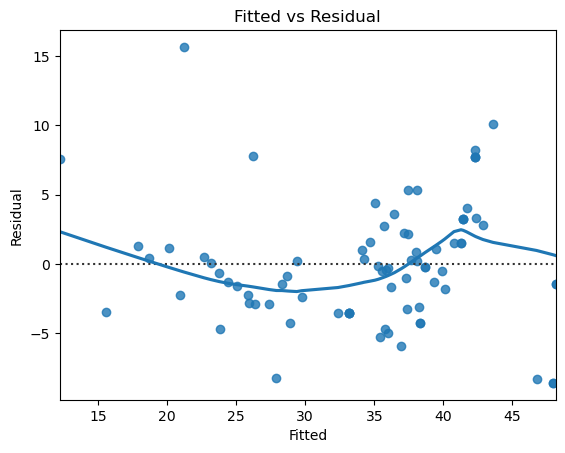

In [26]:
#let us plot the residual plot which takes the residual values and the data
sns.residplot(x=pred,y=cars.MPG,lowess=True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
#residual plots are used to check whether the error are indepemdent or not

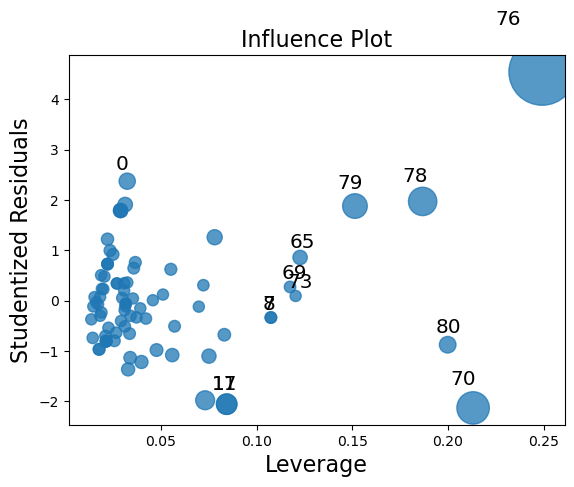

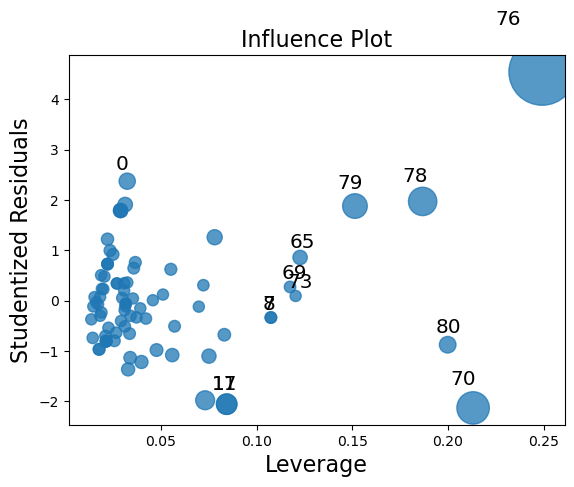

In [27]:
#let us plot the influentia plot
sm.graphics.influence_plot(final_ml)
#we have taken cars instead cars_newdata,hence 76 is reflected again in influential plot

In [28]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
cars_train,cars_test=train_test_split(cars,test_size=0.2)

In [31]:
#preparing the model on train data
model_train=smf.ols('MPG~VOL+SP+HP',data=cars_train).fit()
model_train.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           3.97e-25
Time:                        00:43:05   Log-Likelihood:                -170.60
No. Observations:                  64   AIC:                             349.2
Df Residuals:                      60   BIC:                             357.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.0950     12.663      1.429      0.158      -7.234      43.424
VOL           -0.1692      0.025     -6.907      0.000      -0.218      -0.120
SP             0.5128      0.137      3.738      0.000       0.238       0.787
HP            -0.2519      0.035     -7.271      0.000      -0.321      -0.183
==============================================================================
Omnibus:                        9.711   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.405
Skew:                           0.815   Prob(JB):                      0.00907
Kurtosis:                       3.934   Cond. No.                     5.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
test_pred=model_train.predict(cars_test)
